# Distances vectorielles en NLP : Euclidienne vs Cosinus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches


## Introduction

Pour comparer des **vecteurs de mots** issus d'un modèle d'embedding (Word2Vec, GloVe, BERT…), deux distances sont couramment utilisées :

| Distance | Formule pour $u,v\in\mathbb R^d$ | Sensibilité à la norme |
|----------|-----------------------------------|------------------------|
| **Euclidienne** | $\displaystyle \|u-v\|_2 = \sqrt{\sum_{i=1}^d (u_i-v_i)^2}$ | **Oui** |
| **Cosinus** | $\displaystyle d_{\cos}(u,v)=1-\frac{u\cdot v}{\|u\|\,\|v\|}$ | Non |

### Remarque
La distance euclidienne est sensible à la **magnitude** (longueur) des vecteurs : deux vecteurs de même direction mais de normes très différentes peuvent paraître loin.  
La distance cosinus mesure uniquement **l'angle** entre les vecteurs et est donc **invariante à l'échelle** — d'où son succès pour mesurer la similarité sémantique entre mots.


## La distance euclidienne géométriquement

La distance euclidienne est la distance géométrique entre deux points dans l'espace, et est définie par la formule :
$$\|u-v\|_2 = \sqrt{\sum_{i=1}^d (u_i-v_i)^2}$$
où $u$ et $v$ sont des vecteurs de dimension $d$.

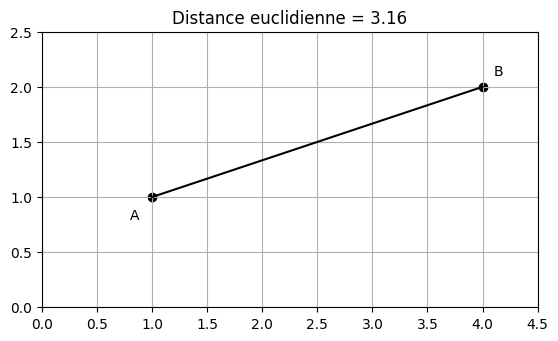

In [2]:
A = np.array([1, 1])
B = np.array([4, 2])
theta = np.array([0.7, 0.2])

# -----------------------------
# 1) Distance euclidienne
# -----------------------------
eucl_dist = np.linalg.norm(A - B)

fig, ax = plt.subplots()
ax.scatter([A[0], B[0]], [A[1], B[1]], color='k')
ax.annotate("A", xy=A, xytext=(A[0] - 0.2, A[1] - 0.2))
ax.annotate("B", xy=B, xytext=(B[0] + 0.1, B[1] + 0.1))
ax.plot([A[0], B[0]], [A[1], B[1]], linestyle='-', color='k')
ax.set_aspect('equal', 'box')
ax.set_title(f"Distance euclidienne = {eucl_dist:.2f}")

ax.set_xlim(0, max(A[0], B[0]) + 0.5)
ax.set_ylim(0, max(A[1], B[1]) + 0.5)
ax.grid(True)
plt.show()


## La distance cosinus géométriquement

La distance cosinus est définie comme :
$$d_{\cos}(u,v)=1-\frac{u\cdot v}{\|u\|\,\|v\|}=1-cos(\theta)$$
où $u\cdot v$ est le produit scalaire de $u$ et $v$ et $\|u\|$ la norme de $u$ et $\theta$ l'angle entre les deux vecteurs.


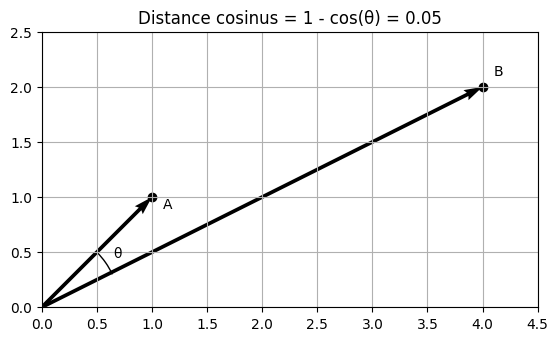

In [3]:

# -----------------------------
# 2) Distance cosinus
# -----------------------------
cos_sim = (A @ B) / (np.linalg.norm(A) * np.linalg.norm(B))
cos_dist = 1 - cos_sim
angle_rad = np.arccos(cos_sim)

fig2, ax2 = plt.subplots()
ax2.scatter([A[0], B[0]], [A[1], B[1]], color='k')
ax2.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1)
ax2.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1)
ax2.annotate("A", xy=A, xytext=(A[0] + 0.1, A[1] - 0.1))
ax2.annotate("B", xy=B, xytext=(B[0] + 0.1, B[1] + 0.1))
ax2.annotate("θ", xy=theta, xytext=(theta[0] - 0.05, theta[1] +0.25))

# Arc pour représenter l'angle
radius = 0.5 * min(np.linalg.norm(A), np.linalg.norm(B))
arc = patches.Arc((0, 0), radius * 2, radius * 2,
                  theta1=25,
                  theta2=45)
ax2.add_patch(arc)

ax2.set_xlim(0, max(A[0], B[0]) + 0.5)
ax2.set_ylim(0, max(A[1], B[1]) + 0.5)
ax2.set_aspect('equal', 'box')
ax2.set_title(f"Distance cosinus = 1 - cos(θ) = {cos_dist:.2f}")
plt.grid()
plt.show()


## Embedding jouet

Nous créons un mini‑embedding 2D pour 8 mots.  
Les vecteurs « royauté » pointent globalement dans la même direction, mais on va amplifier certaines normes pour illustrer la différence de métrique.


In [4]:

words = ["king", "queen", "man", "woman", "apple", "orange", "computer", "laptop"]

# Vecteurs unitaires de base + petites variations
base_vecs = {
    "king":      np.array([0.9, 0.4]),
    "queen":     1.9 * np.array([0.9, 0.4]),      # même direction mais norme ×1.9
    "man":       np.array([0.88, 0.38]),
    "woman":     1.8 * np.array([0.88, 0.38]),    # même direction, norme ×1.8
    "orange":     4.0 * np.array([0.1, 0.9]),       # fruit, norme ×4
    "apple":    np.array([0.1, 0.9]),
    "computer":  np.array([0.3, 0.1]),
    "laptop":    2.5 * np.array([0.3, 0.1])        # même direction, norme ×2.5
}

# Matrice d'embedding
X = np.vstack([base_vecs[w] for w in words])
df_embed = pd.DataFrame(X, index=words, columns=["x1","x2"])
df_embed


,x1,x2
king,0.900,0.400
queen,1.710,0.760
man,0.880,0.380
woman,1.584,0.684
apple,0.100,0.900
orange,0.400,3.600
computer,0.300,0.100
laptop,0.750,0.250


## Distances Euclidiennes et Cosinus entre paires de mots

In [5]:

from scipy.spatial.distance import pdist, squareform

# Paires
eucl_mat  = squareform(pdist(X, metric="euclidean"))
cos_mat   = squareform(pdist(X, metric="cosine"))

df_eucl = pd.DataFrame(eucl_mat, index=words, columns=words)
df_cos  = pd.DataFrame(cos_mat,  index=words, columns=words)

print("Distance euclidienne\n")
display(df_eucl.round(2))

print("\nDistance cosinus\n")
display(df_cos.round(2))


Distance euclidienne



,king,queen,man,woman,apple,orange,computer,laptop
king,0.00,0.89,0.03,0.74,0.94,3.24,0.67,0.21
queen,0.89,0.00,0.91,0.15,1.62,3.13,1.56,1.09
man,0.03,0.91,0.00,0.77,0.94,3.26,0.64,0.18
woman,0.74,0.15,0.77,0.00,1.50,3.15,1.41,0.94
apple,0.94,1.62,0.94,1.50,0.00,2.72,0.82,0.92
orange,3.24,3.13,3.26,3.15,2.72,0.00,3.50,3.37
computer,0.67,1.56,0.64,1.41,0.82,3.50,0.00,0.47
laptop,0.21,1.09,0.18,0.94,0.92,3.37,0.47,0.00



Distance cosinus



,king,queen,man,woman,apple,orange,computer,laptop
king,0.0,0.0,0.0,0.0,0.50,0.50,0.00,0.00
queen,0.0,0.0,0.0,0.0,0.50,0.50,0.00,0.00
man,0.0,0.0,0.0,0.0,0.50,0.50,0.00,0.00
woman,0.0,0.0,0.0,0.0,0.50,0.50,0.00,0.00
apple,0.5,0.5,0.5,0.5,0.00,0.00,0.58,0.58
orange,0.5,0.5,0.5,0.5,0.00,0.00,0.58,0.58
computer,0.0,0.0,0.0,0.0,0.58,0.58,0.00,0.00
laptop,0.0,0.0,0.0,0.0,0.58,0.58,0.00,0.00


## Visualisation en 2D des points

C:\Users\franc\AppData\Local\Temp\ipykernel_16588\2006890668.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(word, (df_embed.x1[i], df_embed.x2[i]), fontsize=10)
C:\Users\franc\AppData\Local\Temp\ipykernel_16588\2006890668.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(word, (df_embed.x1[i], df_embed.x2[i]-0.05), fontsize=10)


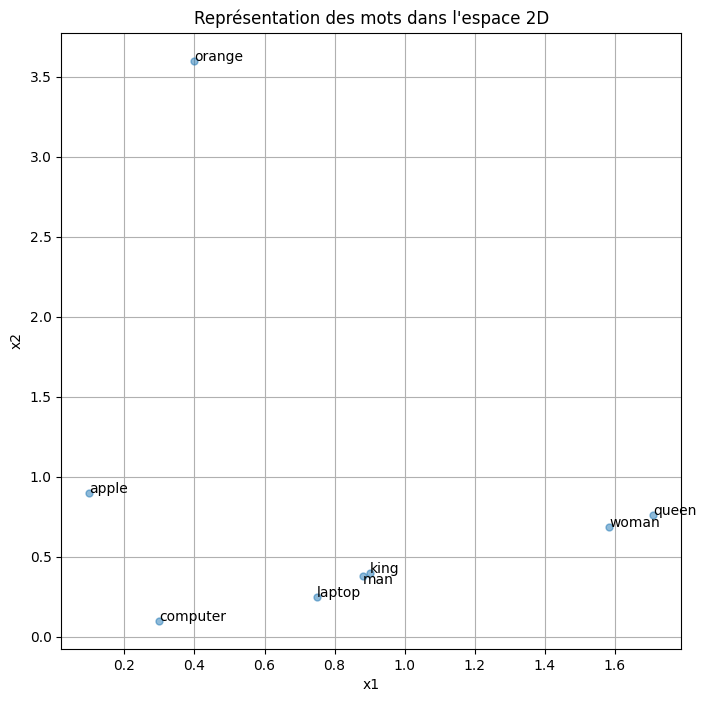

In [6]:
# On créer un graphique avec les points en 2D

plt.figure(figsize=(8, 8))
plt.plot(df_embed.x1, df_embed.x2, "o", markersize=5, alpha=0.5)
# Ajout du label du mot
for i, word in enumerate(words):
    if word=="man":
        plt.annotate(word, (df_embed.x1[i], df_embed.x2[i]-0.05), fontsize=10)
    else:
        plt.annotate(word, (df_embed.x1[i], df_embed.x2[i]), fontsize=10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Représentation des mots dans l'espace 2D")
plt.grid()
plt.show()

On voit que par exemple, 'laptop' est plus proche de 'man' que de 'computer' en distance euclidienne, mais pas en distance cosinus ! 

In [7]:
# distance euclidienne entre laptop et man
print(f"Distance euclidienne entre `laptop` et `man`: {round(df_eucl.loc['laptop']['man'], 5)}")

Distance euclidienne entre `laptop` et `man`: 0.18385


In [8]:
# distance euclidienne entre laptop et computer
print(f"Distance euclidienne entre `laptop` et `computer`: {round(df_eucl.loc['laptop']['computer'], 5)}")

Distance euclidienne entre `laptop` et `computer`: 0.47434


In [9]:
# distance cosinus entre laptop et man
print(f"Distance cosinus entre `laptop` et `man`: {round(df_cos.loc['laptop']['man'], 5)}")

Distance cosinus entre `laptop` et `man`: 0.00369


In [10]:
# distance cosinus entre laptop et computer
print(f"Distance cosinus entre `laptop` et `computer`: {round(df_cos.loc['laptop']['computer'], 5)}")

Distance cosinus entre `laptop` et `computer`: 0.0


# Visualisation des distances en 2D

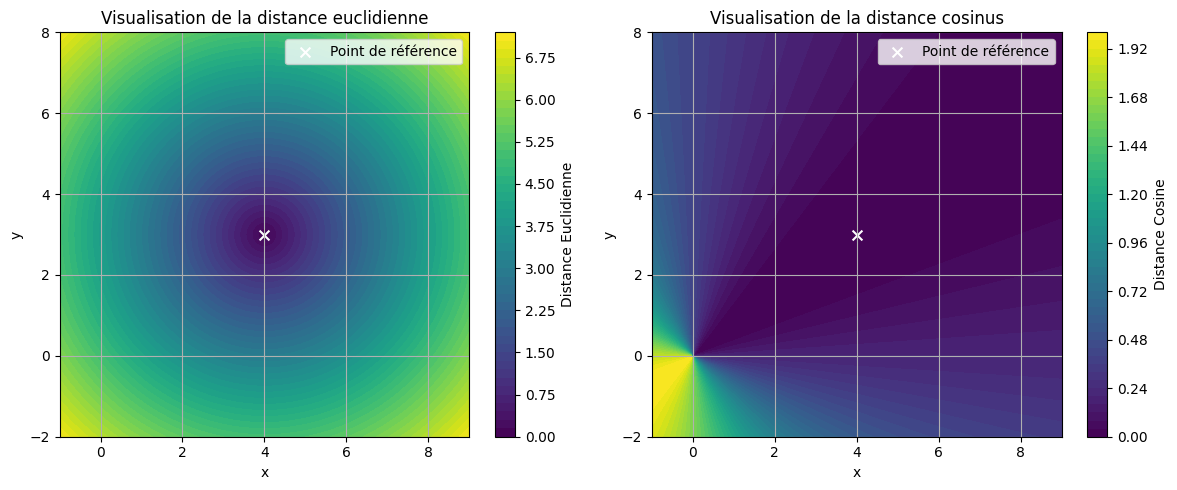

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

x_min, x_max = -1, 9
y_min, y_max = -2, 8
resolution = 200  # Résolution de la grille

# Point de référence
ref_point = np.array([4, 3])

# Créer une grille de points
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

def euclidean_dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2, axis=-1))

def cosine_dist(p1, p2):
    # On ajoute une petite valeur pour éviter la division par zéro
    return np.array([cosine(p1, p) if np.linalg.norm(p) > 1e-10 else 1.0 for p in p2.reshape(-1, 2)]).reshape(resolution, resolution)


points = np.stack([X, Y], axis=-1)

# Calculer les distances
euclidean_dists = euclidean_dist(ref_point, points)
cosine_dists = cosine_dist(ref_point, points)

plt.figure(figsize=(12, 5))
# Graphique pour la distance euclidienne
plt.subplot(1, 2, 1)
plt.contourf(X, Y, euclidean_dists, levels=50, cmap='viridis')
plt.colorbar(label='Distance Euclidienne')
plt.scatter(ref_point[0], ref_point[1], c='white', s=50, label='Point de référence', marker='x')
plt.title('Visualisation de la distance euclidienne')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
# Graphique pour la distance cosine
plt.subplot(1, 2, 2)
plt.contourf(X, Y, cosine_dists, levels=50, cmap='viridis')
plt.colorbar(label='Distance Cosine')
plt.scatter(ref_point[0], ref_point[1], c='white', s=50, label='Point de référence', marker='x')
plt.title('Visualisation de la distance cosinus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.tight_layout()

plt.show()


## Conclusion

* La distance **euclidienne** dépend fortement de la **norme** des vecteurs ; les mots associés à de grandes normes se retrouvent artificiellement éloignés.  
* La distance **cosinus**, invariante à l'échelle, reflète mieux la **direction** donc la similarité sémantique : les groupes « king/queen/man/woman », « apple/orange » et « computer/laptop » ressortent naturellement.

Dans les modèles de langue modernes, on normalise souvent les embeddings ou on se ramène explicitement à la distance cosinus pour des mesures de similarité plus pertinentes.
